In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
file_path = 'https://raw.githubusercontent.com/tbgregg000/Capstone/main/GenericWellData.xlsx%20-%20Sheet1.csv?token=GHSAT0AAAAAACOG37RRBK5NXMVWY2OWFJPIZOORUJQ'
data = pd.read_csv(file_path)

In [4]:
# Basic Data Overview
print("Basic Data Overview:")
print(f"Dataset dimensions: {data.shape}")
print("\nData types:")
print(data.dtypes.value_counts())


Basic Data Overview:
Dataset dimensions: (16707, 87)

Data types:
float64    54
int64      23
object     10
dtype: int64


In [5]:
columns_with_space = [col for col in data.columns if ' ' in col]

# Print the column names with space
print("Columns with space:", columns_with_space)

Columns with space: ['Well Index', ' ProppantIntensity_LBSPerFT ', ' TotalProppant_LBS ', ' TotalWaterPumped_GAL ', ' WaterIntensity_GALPerFT ', ' TotalFluidPumped_BBL ']


In [6]:
# renaming some of the columns
#' ProppantIntensity_LBSPerFT ', ' TotalProppant_LBS ', ' TotalWaterPumped_GAL ', ' WaterIntensity_GALPerFT ', ' TotalFluidPumped_BBL ']
data.rename(columns={' ProppantIntensity_LBSPerFT ': 'ProppantIntensity_LBSPerFT'}, inplace=True)
data.rename(columns={' TotalProppant_LBS ': 'TotalProppant_LBS'}, inplace=True)
data.rename(columns={' TotalWaterPumped_GAL ': 'TotalWaterPumped_GAL'}, inplace=True)
data.rename(columns={' WaterIntensity_GALPerFT ': 'WaterIntensity_GALPerFT'}, inplace=True)
data.rename(columns={' TotalFluidPumped_BBL ': 'TotalFluidPumped_BBL'}, inplace=True)


In [7]:
object_columns = data.select_dtypes(include=['object'])
print(object_columns.dtypes)

InitialProductionDate         object
DrillingStartDate             object
DrillingCompletionDate        object
ProppantIntensity_LBSPerFT    object
TotalProppant_LBS             object
TotalWaterPumped_GAL          object
WaterIntensity_GALPerFT       object
TotalFluidPumped_BBL          object
InitialProductionMonth        object
OilTest_Method                object
dtype: object


In [8]:
# Converting the ts objects into datetime format

# Specify the columns to convert to datetime
columns_to_convert = ['InitialProductionDate', 'DrillingStartDate', 'DrillingCompletionDate']

# Convert specified columns to datetime
for column in columns_to_convert:
    data[column] = pd.to_datetime(data[column], errors='coerce')  # 'coerce' to handle invalid datetime values

In [9]:
# Identifying missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("\nColumns with missing values and their count:")
print(missing_values)


Columns with missing values and their count:
AvgStageSpacing_FT                         15970
FractureStages                             15969
First36MonthProd_MCFEPer1000FT              5847
First36MonthWaterProductionBBLPer1000Ft     5847
First36MonthGas_MCFPer1000FT                5847
First36MonthProd_BOEPer1000FT               5847
First36MonthOil_BBLPer1000FT                5847
First36MonthProd_MCFE                       5846
First36MonthProd_BOE                        5846
First36MonthWater_BBL                       5846
AcidVolume_BBL                              3231
ProppantLoad_LBSPerGAL                      1519
ProppantIntensity_LBSPerFT                  1383
TotalProppant_LBS                           1339
First12MonthProd_BOEPer1000FT               1145
First12MonthGas_MCFPer1000FT                1145
First12MonthOil_BBLPer1000FT                1145
First12MonthProd_MCFEPer1000FT              1145
First12MonthProd_BOE                        1144
First12MonthGas_MCF    

In [10]:
# Summary Statistics for continuous variables
print("\nSummary Statistics for continuous variables:")
print(data.describe().transpose())



Summary Statistics for continuous variables:
                                           count          mean           std  \
Well Index                               16707.0  8.354000e+03  4.823040e+03   
TrueVerticalDepth_FT                     16705.0  8.656169e+03  9.119473e+02   
MeasuredDepth_FT                         16660.0  1.839773e+04  2.397761e+03   
InitialProductionYear                    16707.0  2.018804e+03  2.726209e+00   
UpperPerforation_FT                      16573.0  8.964134e+03  9.627945e+02   
LowerPerforation_FT                      16573.0  1.825558e+04  2.395788e+03   
PerforationInterval_FT                   16659.0  9.305027e+03  2.352612e+03   
LateralLength_FT                         16705.0  9.436192e+03  2.319165e+03   
FractureStages                             738.0  3.941192e+01  3.219165e+01   
AvgStageSpacing_FT                         737.0  1.174155e+03  2.686351e+03   
ProppantLoad_LBSPerGAL                   15188.0  1.009043e+00  3.767033e-

In [11]:
# Temporal Analysis - Simplified overview for initial and completion dates
print("\nTemporal Analysis - Year distribution for DrillingStartDate and InitialProductionDate:")
print(data[['DrillingStartDate', 'InitialProductionDate']].apply(lambda x: x.dt.year).describe())


Temporal Analysis - Year distribution for DrillingStartDate and InitialProductionDate:
       DrillingStartDate  InitialProductionDate
count       16706.000000           16707.000000
mean         2018.211541            2018.804214
std             2.658948               2.726209
min          1981.000000            2011.000000
25%          2016.000000            2017.000000
50%          2018.000000            2019.000000
75%          2020.000000            2021.000000
max          2056.000000            2023.000000


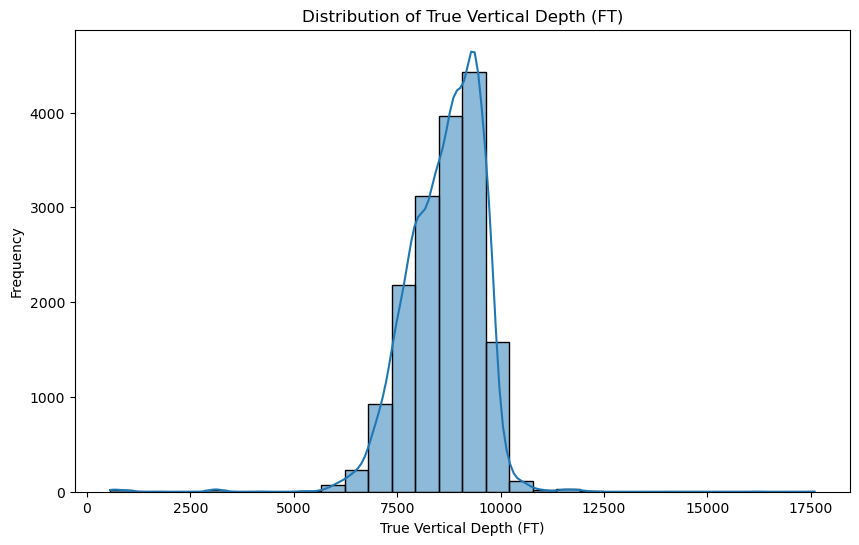

In [12]:
# Histogram for TrueVerticalDepth_FT
plt.figure(figsize=(10, 6))
sns.histplot(data['TrueVerticalDepth_FT'], bins=30, kde=True)
plt.title('Distribution of True Vertical Depth (FT)')
plt.xlabel('True Vertical Depth (FT)')
plt.ylabel('Frequency')
plt.show()

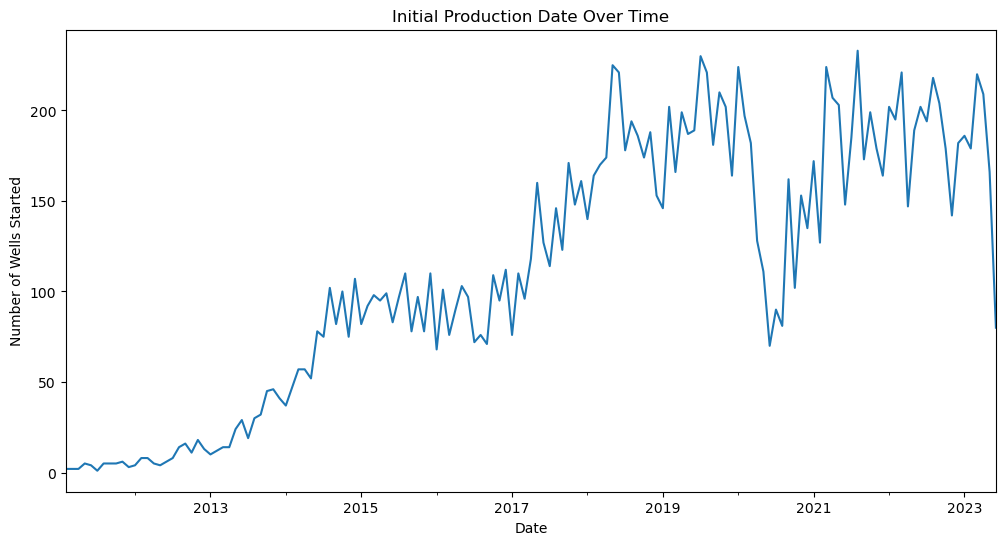

In [13]:
# Time Series plot for Initial Production Date
plt.figure(figsize=(12, 6))
data['InitialProductionDate'].value_counts().sort_index().plot(kind='line')
plt.title('Initial Production Date Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Wells Started')
plt.show()

In [ ]:
# Scatter plot for TrueVerticalDepth_FT vs. TotalProppant_LBS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TrueVerticalDepth_FT', y='TotalProppant_LBS', data=data)
plt.title('True Vertical Depth FT vs. Total Proppant LBS')
plt.xlabel('True Vertical Depth (FT)')
plt.ylabel('Total Proppant (LBS)')
plt.show()

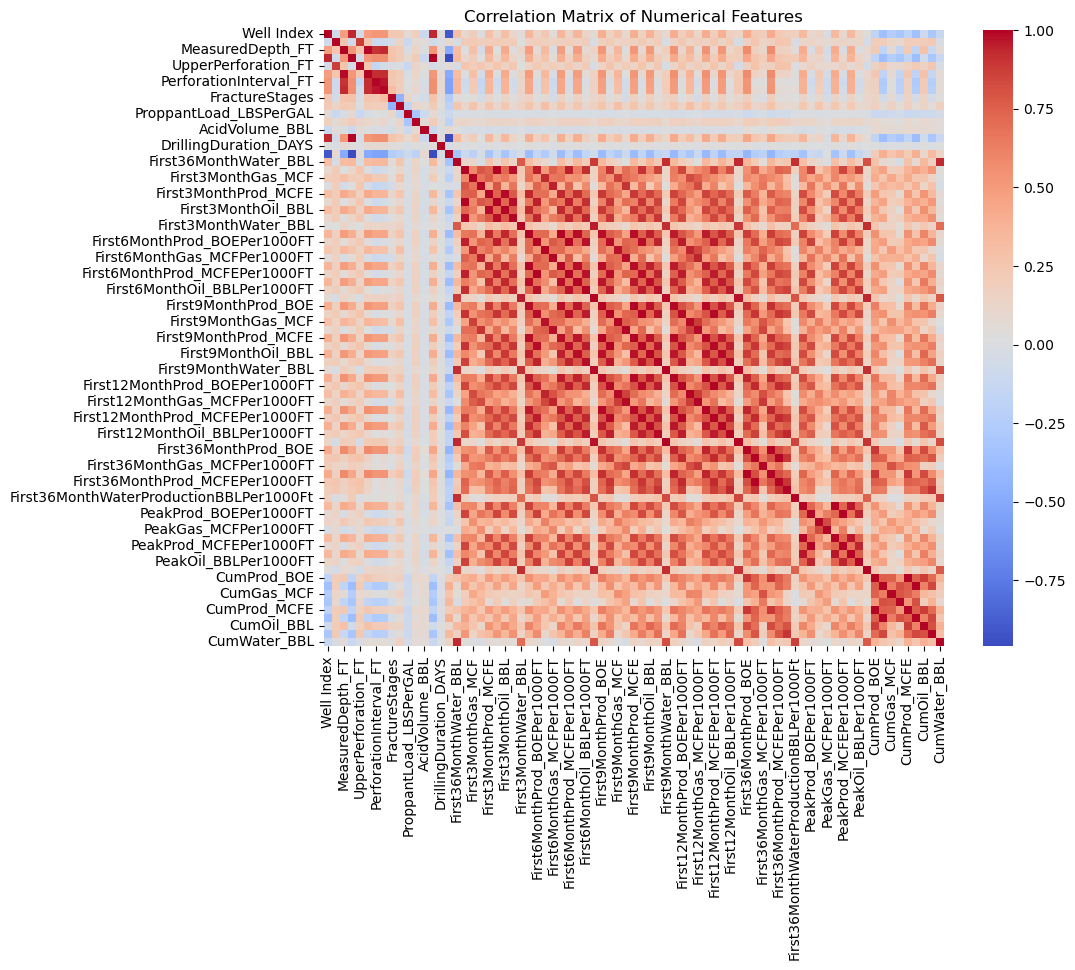

In [14]:
# Correlation Analysis
plt.figure(figsize=(10, 8))
corr = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".1f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [15]:
#Fill missing values with median for numerical columns and mode for categorical columns
for column in data.columns:
    if data[column].dtype == 'float64' or data[column].dtype == 'int64':
        data[column].fillna(data[column].median(), inplace=True)
    elif data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)


In [16]:
# Identify numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns

# Loop through each numerical column to remove outliers
for col in numerical_cols:
    data = data[(np.abs(stats.zscore(data[col])) < 3)]

In [17]:
data_clean = data.drop_duplicates().copy()

In [26]:
data_clean.describe()

,Well Index,TrueVerticalDepth_FT,MeasuredDepth_FT,InitialProductionYear,UpperPerforation_FT,LowerPerforation_FT,PerforationInterval_FT,LateralLength_FT,FractureStages,AvgStageSpacing_FT,ProppantLoad_LBSPerGAL,FluidIntensity_BBLPerFT,AcidVolume_BBL,YearOfDrilling,DrillingDuration_DAYS,ProductionMonthsCount,First36MonthWater_BBL,First3MonthProd_BOEPer1000FT,First3MonthGas_MCF,First3MonthGas_MCFPer1000FT,First3MonthProd_MCFE,First3MonthProd_MCFEPer1000FT,First3MonthOil_BBL,First3MonthOil_BBLPer1000FT,First3MonthWater_BBL,First6MonthProd_BOE,First6MonthProd_BOEPer1000FT,First6MonthGas_MCF,First6MonthGas_MCFPer1000FT,First6MonthProd_MCFE,First6MonthProd_MCFEPer1000FT,First6MonthOil_BBL,First6MonthOil_BBLPer1000FT,First6MonthWater_BBL,First9MonthProd_BOE,First9MonthProd_BOEPer1000FT,First9MonthGas_MCF,First9MonthGas_MCFPer1000FT,First9MonthProd_MCFE,First9MonthProd_MCFEPer1000FT,First9MonthOil_BBL,First9MonthOil_BBLPer1000FT,First9MonthWater_BBL,First12MonthProd_BOE,First12MonthProd_BOEPer1000FT,First12MonthGas_MCF,First12MonthGas_MCFPer1000FT,First12MonthProd_MCFE,First12MonthProd_MCFEPer1000FT,First12MonthOil_BBL,First12MonthOil_BBLPer1000FT,First12MonthWater_BBL,First36MonthProd_BOE,First36MonthProd_BOEPer1000FT,First36MonthGas_MCFPer1000FT,First36MonthProd_MCFE,First36MonthProd_MCFEPer1000FT,First36MonthOil_BBLPer1000FT,First36MonthWaterProductionBBLPer1000Ft,PeakProd_BOE,PeakProd_BOEPer1000FT,PeakGas_MCF,PeakGas_MCFPer1000FT,PeakProd_MCFE,PeakProd_MCFEPer1000FT,PeakOil_BBL,PeakOil_BBLPer1000FT,PeakWater_BBL,CumProd_BOE,CumProd_BOEPer1000FT,CumGas_MCF,CumGas_MCFPer1000FT,CumProd_MCFE,CumProd_MCFEPer1000FT,CumOil_BBL,CumOil_BBLPer1000FT,CumWater_BBL
count,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,1.155700e+04,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,1.155700e+04,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,1.155700e+04,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,1.155700e+04,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,1.155700e+04,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,11557.000000,1.155700e+04,11557.000000,1.155700e+04,11557.000000,11557.00000,11557.000000,1.155700e+04
mean,8732.910530,8660.107727,18429.103054,2019.022411,8965.691702,18295.318422,9341.457645,9468.768885,39.011076,215.028900,0.989772,45.221511,930.822099,2019.022411,18.169767,51.675781,4.129190e+05,5700.172666,46124.681405,5039.354634,316745.894004,34201.039370,45103.536039,4860.279874,87633.471576,101508.136195,10886.983257,105258.416458,11393.875833,6.090487e+05,65321.905382,83965.046465,8987.989963,161173.854374,136378.230164,14724.419573,157873.892187,17139.486285,8.182692e+05,88346.644371,109928.426581,11853.895475,215296.974042,164782.712642,17878.675997,205742.688327,22391.625379,9.886962e+05,107271.905166,130140.572900,14109.527775,261584.710219,280666.106862,32678.581509,51720.685991,1.683997e+06,196070.892489,23453.014580,47510.302674,25381.967812,2734.640694,27931.038418,3019.307519,152291.554902,16407.861642,21718.170633,2336.643766,43673.805659,311986.046552,34576.846067,5.477985e+05,61258.822229,1.871916e+06,207461.086311,220686.28857,24366.834559,4.264141e+05
std,4851.883057,816.536298,2210.365204,2.723804,832.581886,2201.505492,2181.086031,2180.269782,1.019988,1.830389,0.209552,9.709688,1268.563701,2.723804,10.166666,31.961095,1.821058e+05,2582.133728,26301.711561,2798.566455,155688.430108,15492.796409,22724.746291,2256.572943,69706.620919,45169.450491,4255.719017,55823.199883,5681

In [ ]:
cleaned_file_path = 'C:\\Users\\gagno\\OneDrive\\Documents\\Capstone\\Cleaned_GenericWellData.xlsx'
data.to_excel(cleaned_file_path, index=False)
